#### Event Record Progressions  -  Introduction
This program analyses a set of weekly results for a parkrun event, outputting a stepped plot of the male and female event record progression and also tables of each to aid visualisation

**Pandas** is used for data processing and **Matplotlib** is used for the graphical outputs. **MultipleLocator** is imported additionally in order to ease selection of plots tick label intervals.

The input dataset is in a cleaned .csv format and example data here is anonymised.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import  MultipleLocator #facilitates easier control of tick labels on plot


#### Load dataset and display as dataframe
Dataset is read from a .csv file and then converted to a Dataframe (df). The format of the filename must be 
**'[event_name]_history.csv'** (with event names of more than 1 word  seperated by"_")
so that event name can be extracted and used later in plot or table text.

Example format of data in .csv file:
```
EVENT,DATE,FINISHERS,VOLUNTEERS,MALE_FF,MALE_FF_TIME,FEMALE_FF,FEMALE_FF_TIME
321,27/05/2023,413,28,male ANON,00:16:33,female ANON,00:18:54
320,20/05/2023,509,31,male ANON,00:15:27,female ANON,00:17:22
319,13/05/2023,422,34,male ANON,00:15:44,female ANON,00:18:30
318,6/5/2023,468,33,male ANON,00:17:01,female ANON,00:18:43
317,29/04/2023,436,28,male ANON,00:16:07,female ANON,00:19:12
```

In [2]:
filename ="Example_Event_History.csv"
df= pd.read_csv(filename)

#test output: list of dataframe column headers
list(df)

['EVENT',
 'DATE',
 'FINISHERS',
 'VOLUNTEERS',
 'MALE_FF',
 'MALE_FF_TIME',
 'FEMALE_FF',
 'FEMALE_FF_TIME']

#### Keep Only Required Columns
columns required for the analysis are listed in 'cols_to_keep'. Simply using ```df = df[cols_to_keep]```  can raise a **'SettingWithCopyWarning'** later, if
 performing operations on a sliced dataframe so instead, ```.loc[row_indexer,col_indexer]``` is used, which selects all rows of the given columns to replace the existing dataframe.

In [3]:
#select columns to include in analysis. '.loc' prevents inconsistencies later from formatting sliced dataframes
cols_to_keep=['EVENT','DATE','MALE_FF','MALE_FF_TIME','FEMALE_FF','FEMALE_FF_TIME']
df = df.loc[:,cols_to_keep]

#test output
df

,EVENT,DATE,MALE_FF,MALE_FF_TIME,FEMALE_FF,FEMALE_FF_TIME
0,321,27/05/2023,male ANON,00:16:33,female ANON,00:18:54
1,320,20/05/2023,male ANON,00:15:27,female ANON,00:17:22
2,319,13/05/2023,male ANON,00:15:44,female ANON,00:18:30
3,318,6/5/2023,male ANON,00:17:01,female ANON,00:18:43
4,317,29/04/2023,male ANON,00:16:07,female ANON,00:19:12
...,...,...,...,...,...,...
316,5,19/09/2015,male ANON,00:16:16,female ANON,00:21:41
317,4,12/9/2015,male ANON,00:17:49,female ANON,00:22:06
318,3,5/9/2015,male ANON,00:18:03,female ANON,00:21:42
319,2,29/08/2015,male ANON,00:17:53,female ANON,00:20:08


#### Convert Necessary Columns to Datetime
Date column string data is converted to datetime format and stored in a new column **DATE_dt** to allow option of plotting by date and allowing dates in string format to be used on plot text.

Original string data has some inconsistencies in format in that sometimes single digit dates and months have a leading zero. Replacing the DATE column with string data formatted from the DATE_dt column fixes this, using **strftime('%#d/%#m/%Y'**.

'MALE_FF_TIME' and 'FEMALE_FF_TIME' are converted to datetime and seperate 'string' version columns are created, with plot text in mind. The leading "00:" is sliced from these strings, which is only an issue if  the parkrun has the unlikely occurance of a first finisher time greater than 1 hour.

In [4]:
#Convert Date column to datetime format
df['DATE_dt']=pd.to_datetime(df['DATE'],format= '%d/%m/%Y')

# Reformat date_string col using datetime column to solve inconsistencies
df['DATE'] = df['DATE_dt'].dt.strftime('%#d/%#m/%Y')

#convert Time columns to datetime 
timecols=["MALE_FF_TIME",'FEMALE_FF_TIME']
for col in timecols:
    
    df[col]=pd.to_datetime(df[col], format='%H:%M:%S')
    df[col+"_string"]=df[col].dt.strftime('%M:%S')

#test output
df

,EVENT,DATE,MALE_FF,MALE_FF_TIME,FEMALE_FF,FEMALE_FF_TIME,DATE_dt,MALE_FF_TIME_string,FEMALE_FF_TIME_string
0,321,27/5/2023,male ANON,1900-01-01 00:16:33,female ANON,1900-01-01 00:18:54,2023-05-27,16:33,18:54
1,320,20/5/2023,male ANON,1900-01-01 00:15:27,female ANON,1900-01-01 00:17:22,2023-05-20,15:27,17:22
2,319,13/5/2023,male ANON,1900-01-01 00:15:44,female ANON,1900-01-01 00:18:30,2023-05-13,15:44,18:30
3,318,6/5/2023,male ANON,1900-01-01 00:17:01,female ANON,1900-01-01 00:18:43,2023-05-06,17:01,18:43
4,317,29/4/2023,male ANON,1900-01-01 00:16:07,female ANON,1900-01-01 00:19:12,2023-04-29,16:07,19:12
...,...,...,...,...,...,...,...,...,...
316,5,19/9/2015,male ANON,1900-01-01 00:16:16,female ANON,1900-01-01 00:21:41,2015-09-19,16:16,21:41
317,4,12/9/2015,male ANON,1900-01-01 00:17:49,female ANON,1900-01-01 00:22:06,2015-09-12,17:49,22:06
318,3,5/9/2015,male ANON,1900-01-01 00:18:03,female ANON,1900-01-01 00:21:42,2015-09-05,18:03,21:42
319,2,29/8/2015,male ANON,1900-01-01 00:17:53,female ANON,1900-01-01 00:20:08,2015-08-29,17:53,20:08


#### Order Dataframe by event number
Table appears by default on parkrun website with latest event first. Reordering here chronologically facilitates easy iterations for record progression and also improves df visualisation
```.reset_index(drop=True)``` ensures the dataframe is not just flipped for visualisation, but indexes are reset in the new order.

In [5]:
#Reorder by event number 
df = df.loc[::-1].reset_index(drop=True)

#test output
df

,EVENT,DATE,MALE_FF,MALE_FF_TIME,FEMALE_FF,FEMALE_FF_TIME,DATE_dt,MALE_FF_TIME_string,FEMALE_FF_TIME_string
0,1,22/8/2015,male ANON,1900-01-01 00:17:21,female ANON,1900-01-01 00:21:10,2015-08-22,17:21,21:10
1,2,29/8/2015,male ANON,1900-01-01 00:17:53,female ANON,1900-01-01 00:20:08,2015-08-29,17:53,20:08
2,3,5/9/2015,male ANON,1900-01-01 00:18:03,female ANON,1900-01-01 00:21:42,2015-09-05,18:03,21:42
3,4,12/9/2015,male ANON,1900-01-01 00:17:49,female ANON,1900-01-01 00:22:06,2015-09-12,17:49,22:06
4,5,19/9/2015,male ANON,1900-01-01 00:16:16,female ANON,1900-01-01 00:21:41,2015-09-19,16:16,21:41
...,...,...,...,...,...,...,...,...,...
316,317,29/4/2023,male ANON,1900-01-01 00:16:07,female ANON,1900-01-01 00:19:12,2023-04-29,16:07,19:12
317,318,6/5/2023,male ANON,1900-01-01 00:17:01,female ANON,1900-01-01 00:18:43,2023-05-06,17:01,18:43
318,319,13/5/2023,male ANON,1900-01-01 00:15:44,female ANON,1900-01-01 00:18:30,2023-05-13,15:44,18:30
319,320,20/5/2023,male ANON,1900-01-01 00:15:27,female ANON,1900-01-01 00:17:22,2023-05-20,15:27,17:22


#### Create Lists of Row Indices of Equalled or Broken Records
Male and Female 'record break' lists are initiated, with zero entered initially to denote first event FF times being the records. Make and Female FF_TIME data is coverted to time in minutes. Those columns are then iterated and index of any row equalling or breaking record are appended to the **breaks_m** or **breaks_f** lists.

In [6]:
# intiated lists of event numbers of male and female record breaks or equals, starting with 1
breaks_m=[0] 
breaks_f=[0] 

# Create t_zero time instance 
t_zero=pd.to_datetime('00:00:00', format='%H:%M:%S') 
# for FF_TIME columns change to time in minutes 

for col in ["MALE_FF_TIME",'FEMALE_FF_TIME']:
    df[col]=df[col]-t_zero                                 # subtracts t_zero to make the time column a timedelta
    df[col]=df[col].dt.total_seconds()/60          # calculates total minutes in the timedelta
    
    # then iterate rows and, if FF_TIME is record or equal to record, event number to 'breaks' list
    record=df[col][0]#set event 1 FF times as initial record
    for i in range(1,len(df)):  
        if (df[col][i])<=record: #if time is a record or equal to record
            record=df[col][i]  #update record
            if col=='MALE_FF_TIME':
                breaks_m.append(i)
            else:
                breaks_f.append(i)
           
     
#test output
print("breaks_m: ",breaks_m)
print("breaks_f: ",breaks_f)



breaks_m:  [0, 4, 28, 43, 49, 88, 115, 263]
breaks_f:  [0, 1, 5, 10, 19, 27, 48, 51, 177, 178, 293]


#### Create Male and Female Record Progression Dataframes
the lists of indices are used to filter the dataframe in to seperate male and female 'record progression' dataframes **df_mprog** and  **df_fprog**. Opposite gender columns are dropped

In [7]:
#filter to get record progression male dataframe
df_mprog = df.filter(items = breaks_m, axis=0)
df_mprog.drop(['FEMALE_FF', 'FEMALE_FF_TIME','FEMALE_FF_TIME_string'], axis=1, inplace=True)

#filter to get record progression female dataframe
df_fprog = df.filter(items = breaks_f, axis=0)
df_fprog.drop(['MALE_FF', 'MALE_FF_TIME','MALE_FF_TIME_string'], axis=1, inplace=True)

#test output
print(df_mprog)
print(df_fprog)


     EVENT        DATE    MALE_FF  MALE_FF_TIME    DATE_dt MALE_FF_TIME_string
0        1   22/8/2015  male ANON     17.350000 2015-08-22               17:21
4        5   19/9/2015  male ANON     16.266667 2015-09-19               16:16
28      29   27/2/2016  male ANON     16.216667 2016-02-27               16:13
43      44   11/6/2016  male ANON     16.083333 2016-06-11               16:05
49      50   30/7/2016  male ANON     15.133333 2016-07-30               15:08
88      89    6/5/2017  male ANON     15.083333 2017-05-06               15:05
115    116  18/11/2017  male ANON     14.833333 2017-11-18               14:50
263    264   23/4/2022  male ANON     14.783333 2022-04-23               14:47
     EVENT        DATE    FEMALE_FF  FEMALE_FF_TIME    DATE_dt  \
0        1   22/8/2015  female ANON       21.166667 2015-08-22   
1        2   29/8/2015  female ANON       20.133333 2015-08-29   
5        6   26/9/2015  female ANON       20.133333 2015-09-26   
10      11  31/10/2015  f

#### Create Male and Female Record Progression Dataframes to use as Tables on Plot
selected columns with appropriate string format from **df_mprog** and  **df_fprog** are renamed and used to make neat dataframes for use as table values on the plot.

In [8]:
#create customised tables from dfs (tbl)

df_tbl_m = df_mprog[['MALE_FF','MALE_FF_TIME_string','DATE','EVENT']]
df_tbl_m.columns=['NAME','TIME','DATE','EVENT']

df_tbl_f = df_fprog[['FEMALE_FF','FEMALE_FF_TIME_string','DATE','EVENT']]
df_tbl_f.columns=['NAME','TIME','DATE','EVENT']

#test output
print(df_tbl_f)
print(df_tbl_m)

            NAME   TIME        DATE  EVENT
0    female ANON  21:10   22/8/2015      1
1    female ANON  20:08   29/8/2015      2
5    female ANON  20:08   26/9/2015      6
10   female ANON  19:39  31/10/2015     11
19   female ANON  18:01    1/1/2016     20
27   female ANON  17:26   20/2/2016     28
48   female ANON  17:10   23/7/2016     49
51   female ANON  17:05   13/8/2016     52
177  female ANON  17:04   23/2/2019    178
178  female ANON  15:58    2/3/2019    179
293  female ANON  15:44   3/12/2022    294
          NAME   TIME        DATE  EVENT
0    male ANON  17:21   22/8/2015      1
4    male ANON  16:16   19/9/2015      5
28   male ANON  16:13   27/2/2016     29
43   male ANON  16:05   11/6/2016     44
49   male ANON  15:08   30/7/2016     50
88   male ANON  15:05    6/5/2017     89
115  male ANON  14:50  18/11/2017    116
263  male ANON  14:47   23/4/2022    264


#### Extract Plot Text From Dataframe and Filename

Event name string comes from splitting the filename by "_" then joining with space(" "), leaving out last part. Inaugural and Latest event dates are from first and last rows of df. Number of events is simply length of dataframe.

In [9]:
#extract variables from filename and dataframe which will be used in plot text
spl= filename.split("_") #splits filename at each underscore into list of its components
ev_name=" ".join(spl[0:-1]) #joins as string all but the last item in the split filename ("History.csv")

#extract date range variables
latest=df['DATE'].iloc[-1]
inaugural=df['DATE'].iloc[0]
events=len(df)

#test output
print(spl)
print(ev_name)
print( inaugural, latest, events)

['Example', 'Event', 'History.csv']
Example Event
22/8/2015 27/5/2023 321


#### Plot of Records Progression With Tables 

3 subplots are arranged on the matplotlib figure. A step plot of male and female record progressions is added on the first subplot (ax1), which takes up half the figure. Axes are removed from the other subplots (ax2 and ax3) as tables are inserted on these, with **df_tbl_m.values** and **df_tbl_f.values** selected as the data.

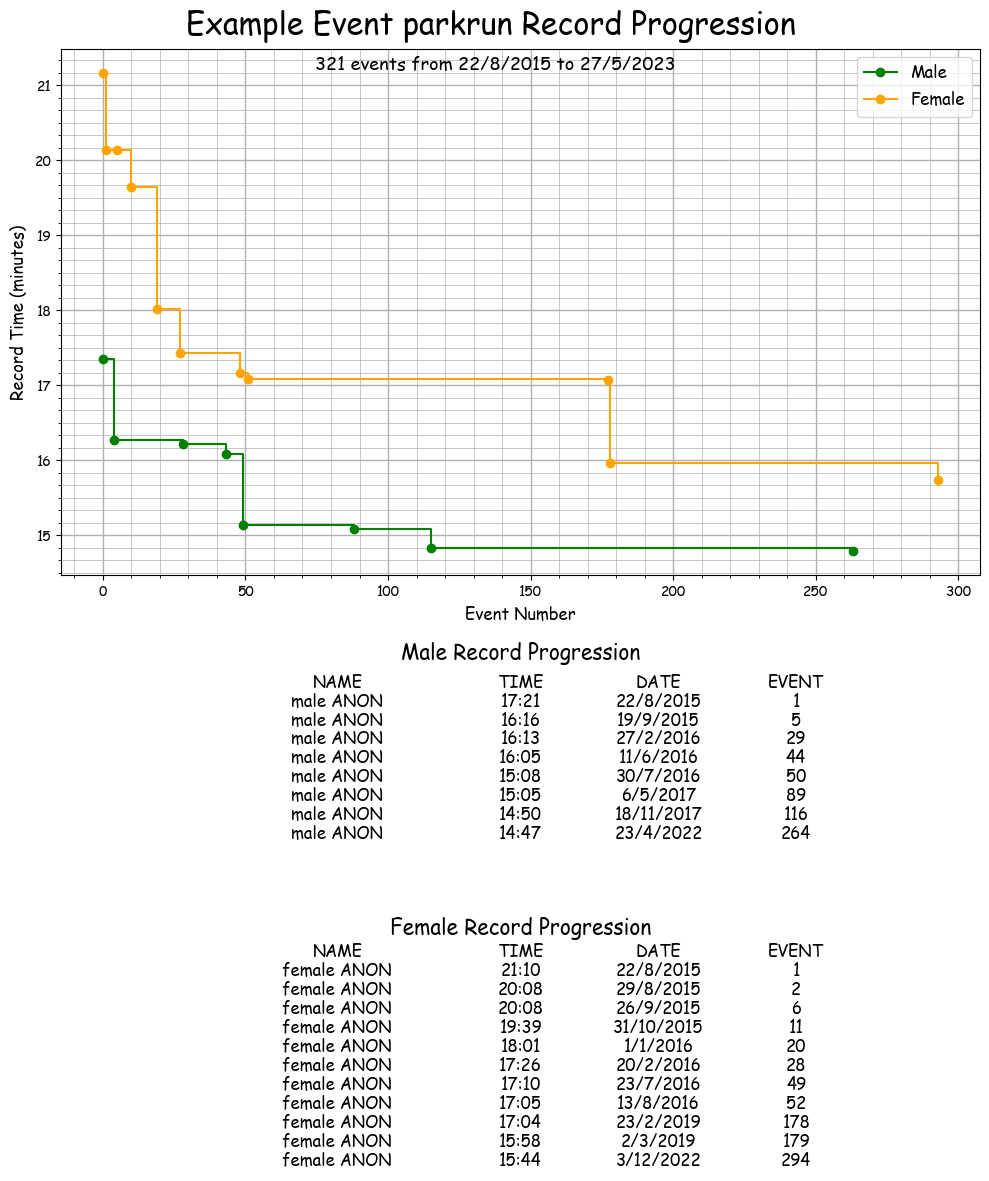

In [10]:
#figure and scatter subplot layout
plt.rcParams.update({'font.family': 'Comic Sans MS'}) #sets default font for graph text
fig = plt.figure(figsize=(10,12))

ax1=plt.subplot(4,1,(1,2))  #axes plot takes up half of 4 row figure (rows, cols, indices)

ax2=plt.subplot(4,1,3)      #2nd axis space takes up 3rd row
ax2.axis('off')             #turns off the axis lines and labels

ax3=plt.subplot(4,1,4)      #3rd axis space takes up 3rd row
ax3.axis('off')             #turns off the axis lines and labels


#plot step data
ax1.step(df_mprog.index,df_mprog['MALE_FF_TIME'], marker='o', color= 'green', where='post', label='Male')
ax1.step(df_fprog.index,df_fprog['FEMALE_FF_TIME'], marker='o', color= 'orange', where='post', label='Female')

#plot tables of male and female progressions
tbl_m=ax2.table(cellText=df_tbl_m.values, colLabels=df_tbl_m.columns, loc='center',cellLoc='center', edges='open',colWidths=[0.3,0.1,0.2,0.1])
tbl_f=ax3.table(cellText=df_tbl_f.values, colLabels=df_tbl_f.columns, loc='center',cellLoc='center', edges='open',colWidths=[0.3,0.1,0.2,0.1])

#---------- Plot Customisations-----------

#Title
fig.suptitle(f'{ev_name} parkrun Record Progression ', fontsize=22)

#create subtitle
fig.text(0.5, 0.93, f"{events} events from {inaugural} to {latest}", fontsize = 13, ha = 'center')

#axis labels
ax1.set_xlabel ('Event Number',fontsize = 12)
ax1.set_ylabel ('Record Time (minutes)',fontsize = 12)

# apply legend to plot 
ax1.legend(fontsize = 12, markerscale=1)

#Use imported MultipleLocator to set majaor and minor tick intervals
ax1.yaxis.set_major_locator(MultipleLocator(1))    # minor interval of 1 minute
ax1.yaxis.set_minor_locator(MultipleLocator(1/6))  # minor interval of 10s
ax1.xaxis.set_minor_locator(MultipleLocator(10))   # minor interval of 10 events

#select to show grid on plot with major gridlines thicker than minor
ax1.grid(visible=True, which = 'major', linewidth=1)
ax1.grid(visible=True, which = 'minor',linewidth=0.5)
ax1.set_axisbelow(True) #ensures data points appear infront of gridlines

#set font size of text in tables
tblfontsize= 12
tbl_m.auto_set_font_size(False)  #disables 'auto-sizing' of font
tbl_m.set_fontsize(tblfontsize)  #sets fontsize
tbl_f.auto_set_font_size(False)
tbl_f.set_fontsize(tblfontsize)

#table titles
ax2.set_title('Male Record Progression', y=0.9,fontsize = 15) #adjusting 'y' allows control over position
ax3.set_title('Female Record Progression', y=1,fontsize = 15)

plt.tight_layout()